<a href="https://colab.research.google.com/github/feliptlopes/projeto_290824/blob/main/Projeto_disciplina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O projeto consiste em avaliar a prevalência do HTLV em uma determinada população, possuindo como objetivo explorar a relação entre a infecção por HTLV-1/ e diferentes características da população, usando estatísticas descritivas, testes de hipóteses e um modelo de regressão logística. A análise é feita tanto para a população em geral quanto para um subgrupo específico relacionado a HTLV-1/2.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Carregamento e Preparação dos Dados:
Importa bibliotecas essenciais como pandas, matplotlib, scipy e scikit-learn. Carrega os dados de dois arquivos CSV: 'Pop_geral.csv' e 'HTLV-1_2.csv'. Cria DataFrames (data1 e data2) para manipular os dados. Define índices e organiza os dados para facilitar a análise.

In [ ]:
import pandas as pd

# Carrega os dados dos arquivos CSV em DataFrames
data1 = pd.read_csv('/content/drive/MyDrive/Projeto_Data_Science/Pop_geral.csv')

# Cria um DataFrame
data1 = pd.DataFrame({'Total': data1['Total'], 'Positivo': data1['Positivo'], 'Negativo': data1['Negativo'], 'Caracteristicas': data1['Caracteristicas']})

# Define a coluna 'Caracteristicas' como índice
data1 = data1.set_index(data1['Caracteristicas'])

Caracteristicas = ['Masculino', 'Feminino', 'Branco', 'Negro', 'Pardo', 'Amarelo', 'Criança (7 a 11)', 'Adolescente (12 a 17)',
'Jovem adulto (18 a 29)', 'Adulto (30 a 59)', 'Idoso (≥ 60)', 'Analfabeto', 'Fundamental', 'Médio', 'Superior', 'Pós-graduação',
'Baixa (< 1)', 'Renda média (1 à 2)', 'Renda média-alta (3 à 4)', 'Renda alta (≧ 5)']

# Reordena o DataFrame com base na lista 'Caracteristicas'
data1 = data1.reindex(Caracteristicas)

# Remove a coluna 'Caracteristicas'
data1 = data1.drop(columns=['Caracteristicas'])

data1

,Total,Positivo,Negativo
Caracteristicas,,,
Masculino,570,2,568
Feminino,1002,4,998
Branco,459,2,457
Negro,223,2,221
Pardo,838,2,836
Amarelo,31,0,31
Criança (7 a 11),28,0,28
Adolescente (12 a 17),68,0,68
Jovem adulto (18 a 29),382,0,382


2. Análise Descritiva:
Calcular e exibir estatísticas descritivas da população em geral (data1), como média, desvio padrão, etc. Calcula a prevalência de resultados positivos para cada característica demográfica/socioeconômica, exibindo os resultados em uma tabela e um gráfico de barras.

             Total   Positivo    Negativo
count    20.000000  20.000000   20.000000
mean    386.000000   1.500000  384.500000
std     279.993045   1.468977  279.430342
min       6.000000   0.000000    6.000000
25%     147.750000   0.000000  144.500000
50%     402.500000   1.000000  402.000000
75%     539.250000   2.000000  538.000000
max    1002.000000   5.000000  998.000000

Prevalência de Positivos por Característica:
Caracteristicas
Masculino                   0.350877
Feminino                    0.399202
Branco                      0.435730
Negro                       0.896861
Pardo                       0.238663
Amarelo                     0.000000
Criança (7 a 11)            0.000000
Adolescente (12 a 17)       0.000000
Jovem adulto (18 a 29)      0.000000
Adulto (30 a 59)            0.133690
Idoso (≥ 60)                1.672241
Analfabeto                  0.000000
Fundamental                 2.469136
Médio                       0.236407
Superior                    0.189036
Pós-g

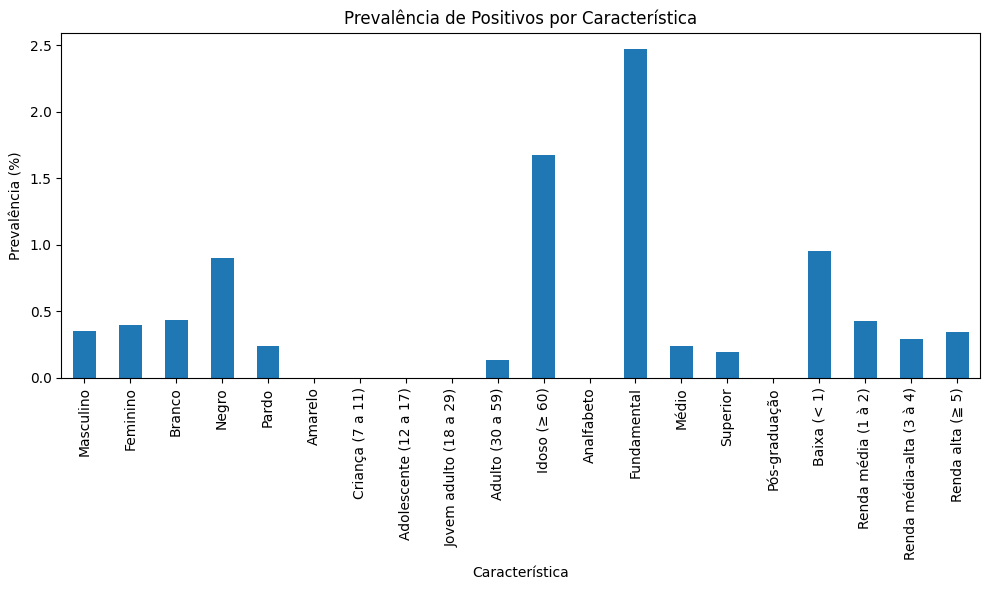

In [ ]:
import pandas as pd

# Calculate descriptive statistics for numerical columns
descriptive_stats = data1.describe()

# Display descriptive statistics
print(descriptive_stats)

# Calculate prevalence of positives for each characteristic
prevalence_positivos = data1['Positivo'] / data1['Total'] * 100

# Display prevalence
print("\nPrevalência de Positivos por Característica:")
print(prevalence_positivos)

# Create a bar chart of prevalence
prevalencia_positivos.plot(kind='bar', figsize=(10, 6))
plt.title('Prevalência de Positivos por Característica')
plt.xlabel('Característica')
plt.ylabel('Prevalência (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. Testes Estatísticos:
Realizar um teste qui-quadrado para verificar a associação entre escolaridade e resultado positivo.
Realizar um teste t de Student para comparar a prevalência entre sexos (masculino e feminino).

In [ ]:
import scipy.stats as stats

# Teste qui-quadrado para associação entre escolaridade e resultado positivo
crosstab = pd.crosstab(data1.index, data1['Positivo'] > 0) # Cria tabela de contingência
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"Chi-quadrado: {chi2}, p-valor: {p}")

Chi-quadrado: 19.999999999999996, p-valor: 0.3945781820860015


In [ ]:
import pandas as pd
import scipy.stats as stats

# Teste t de Student para comparar prevalência entre Masculino e Feminino
masculino = data1.loc['Masculino', 'Positivo'] / data1.loc['Masculino', 'Total']
feminino = data1.loc['Feminino', 'Positivo'] / data1.loc['Feminino', 'Total']
t_statistic, p_value = stats.ttest_ind(masculino, feminino)
print(f"t-statistic: {t_statistic}, p-valor: {p_value}")


t-statistic: nan, p-valor: nan


4. Modelagem Preditiva:
Utiliza um modelo de Regressão Logística para tentar prever a probabilidade de um resultado positivo com base em outras variáveis (total, positivo, negativo). Avalia a acurácia do modelo usando a métrica 'accuracy_score'.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Prepare os dados:
# - Separe as variáveis independentes (X) e a variável dependente (y)

X = data1[['Total', 'Positivo', 'Negativo']]
y = (data1['Positivo'] > 0).astype(int)  # Crie uma variável binária para o resultado positivo e garanta que seja um inteiro

# - Codifique as variáveis categóricas (se necessário)
# ... (Utilize OneHotEncoder ou LabelEncoder do Scikit-learn) ...

# - Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Crie e treine o modelo:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel()) # Adicionado .values.ravel() para evitar DataConversionWarning

# 3. Faça previsões e avalie o modelo:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")

Acurácia do modelo: 0.75


5. Análise Específica para HTLV-1/2:
Carregar e organizar dados específicos sobre HTLV-1/2 (data2). Calcular e exibir a prevalência de resultados positivos por sexo. Realizar um teste qui-quadrado para comparar a prevalência entre sexos para HTLV-1/2.

In [ ]:
import pandas as pd

# Carrega os dados dos arquivos CSV em DataFrames
data2 = pd.read_csv('/content/drive/MyDrive/Projeto_Data_Science/HTLV-1_2.csv')
data2 = pd.DataFrame({'Positivo': data2['Positivo'], 'Negativo': data2['Negativo'], 'Sexo': data2['Sexo']})
# Define a coluna 'Sexo' como índice
data2 = data2.set_index(data2['Sexo'])
Sexo = ['Feminino', 'Masculino']
# Reordena o DataFrame com base na lista 'Sexo'
data2 = data2.reindex(Sexo)
# Remove a coluna 'Sexo' (já que agora é o índice)
data2 = data2.drop(columns=['Sexo'])

data2


,Positivo,Negativo
Sexo,,
Feminino,4,998
Masculino,2,568


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Prevalência de Positivos por Sexo
prevalencia_sexo = data2['Positivo'] / (data2['Positivo'] + data2['Negativo']) * 100
print(prevalencia_sexo)

Sexo
Feminino     0.399202
Masculino    0.350877
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Teste qui-quadrado para comparar prevalência entre sexos
crosstab = pd.crosstab(data2.index, data2['Positivo'] > 0)
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"Chi-quadrado: {chi2}, p-valor: {p}")

Chi-quadrado: 0.0, p-valor: 1.0
